In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!pip install docx2txt
!pip install chart_studio

[nltk_data] Downloading package stopwords to C:\Users\puneet
[nltk_data]     gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\puneet
[nltk_data]     gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  Using cached docx2txt-0.9-py3-none-any.whl.metadata (529 bytes)
Using cached docx2txt-0.9-py3-none-any.whl (4.0 kB)
  Using cached chart_studio-1.1.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached retrying-1.4.2-py3-none-any.whl.metadata (5.5 kB)
Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
Using cached retrying-1.4.2-py3-none-any.whl (10 kB)
Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)

   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [narwhals]
   ---------- ----------------------------- 1/4 [n

In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import docx2txt
from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

import chart_studio.plotly as py

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.describe()


,Category,Resume
count,962,962
unique,25,167
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.shape

(962, 2)

In [ ]:
df.dtypes

,0
Category,object
Resume,object


In [ ]:
df[df.isna().any(axis=1) | df.isnull().any(axis=1)]

,Category,Resume


In [ ]:
df['length'] = df['Resume'].str.len()
df['length'].describe()

,length
count,962.000000
mean,3151.996881
std,2884.003205
min,1.000000
25%,1214.000000
50%,2355.000000
75%,3911.000000
max,14816.000000


Text(0.5, 1.0, 'Resume length distribution')

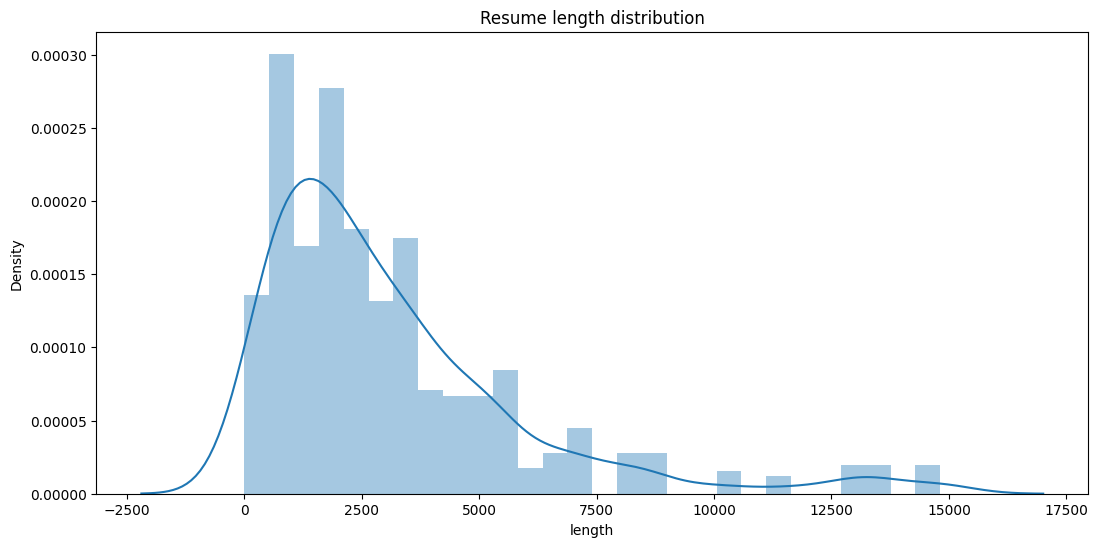

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution')

### Displaying the distinct categories of resume and the number of records belonging to each category

In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


<Axes: xlabel='count', ylabel='Category'>

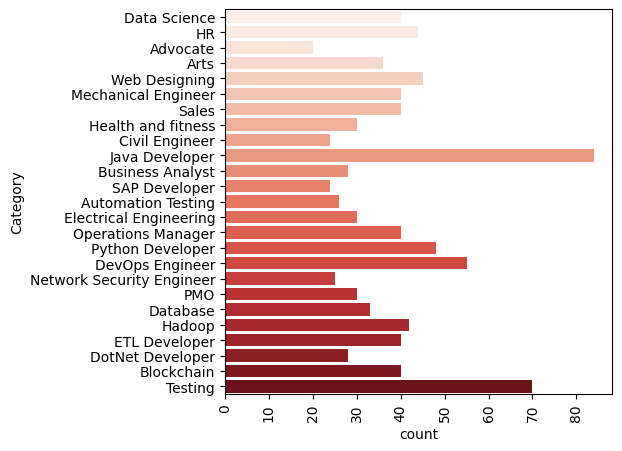

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [ ]:
df['Category'].value_counts()[:3].index

Index(['Java Developer', 'Testing', 'DevOps Engineer'], dtype='object', name='Category')

Processing Text


In [ ]:
resumeDataSet = df.copy()
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,length,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,4786,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,1268,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",1871,
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",452,


In [ ]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

### Encoding labels into different values

In [ ]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
resumeDataSet.head()

,Category,Resume,length,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,4786,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,1268,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",1871,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",452,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)


Feature completed .....
(769, 1500)


In [ ]:
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.95
Accuracy of KNeighbors Classifier on test set: 0.94


In [ ]:
!pip install pickle
import pickle

save_label_encoder = open("pickles/le.pickle","wb")
pickle.dump(le, save_label_encoder)
save_label_encoder.close()

save_word_vectorizer = open("pickles/word_vectorizer.pickle","wb")
pickle.dump(word_vectorizer, save_word_vectorizer)
save_word_vectorizer.close()

save_classifier = open("pickles/clf.pickle","wb")
pickle.dump(clf, save_classifier)
save_classifier.close()


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


FileNotFoundError: [Errno 2] No such file or directory: 'pickles/le.pickle'

In [ ]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]


In [ ]:
job_description = """
Job Overview

We are looking for a passionate Data Science Intern to join our analytics team for a 6-month internship. As an intern, you will support data-driven projects by analyzing datasets, building basic machine learning models, and creating visualizations. This role is ideal for students or recent graduates eager to gain hands-on experience in data science and contribute to real-world business solutions.

Responsibilities





Assist in collecting, cleaning, and preprocessing datasets for analysis.



Perform exploratory data analysis to identify trends and insights.



Develop and test simple machine learning models under supervision.



Create data visualizations to communicate findings to team members.



Support senior data scientists in deploying models and interpreting results.



Document processes and findings for project reports.

Required Skills





Programming: Basic knowledge of Python or R for data analysis.



Machine Learning: Familiarity with scikit-learn or similar libraries (e.g., basic regression or clustering).



Data Manipulation: Understanding of Pandas or SQL for data handling.



Visualization: Exposure to Matplotlib, Seaborn, or similar tools.



Statistics: Basic understanding of statistical concepts (e.g., mean, standard deviation, correlation).



Learning Mindset: Eagerness to learn and apply data science techniques.

Qualifications





Current enrollment in or recent graduation from a Bachelor’s program in Computer Science, Statistics, Mathematics, or a related field.



Completion of at least one academic project or coursework in data science or machine learning.



Strong problem-solving skills and attention to detail.



Ability to work collaboratively in a team environment.

Preferred Qualifications





Familiarity with Jupyter Notebooks or data science workflows.



Basic knowledge of databases or data querying.



Interest in business applications of data science.
"""

In [ ]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Data Science'

Cosine Similarity

In [ ]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 17.9 MB/s eta 0:00:00


In [ ]:
text_tokenizer= WhitespaceTokenizer()
remove_characters= str.maketrans("", "", "±§!@#$%^&*()-_=+[]}{;'\:,./<>?|")
cv = CountVectorizer()

resume_docx = docx2txt.process('RhythemJainResume.docx')

#takes the texts in a list
text_docx= [resume_docx, job_description]
#creating the list of words from the word document
words_docx_list = text_tokenizer.tokenize(resume_docx)
#removing speacial charcters from the tokenized words
words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
#giving vectors to the words
count_docx = cv.fit_transform(text_docx)
#using the alogorithm, finding the match between the resume/cv and job description
similarity_score_docx = cosine_similarity(count_docx)
match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
f'Match percentage with the Job description: {match_percentage_docx}'

'Match percentage with the Job description: 54.75'

In [ ]:
!pip install colabcode

Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio